## Face detection on person’s images using opencv 

In [1]:
import cv2
#importing opencv

In [2]:
import matplotlib.pyplot as plt
#importing matplotlib for plotting image

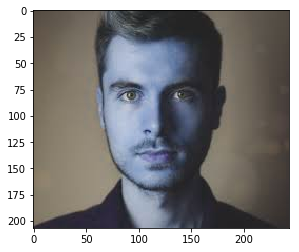

In [3]:
img = cv2.imread('faceimg.jpg')
plt.imshow(img)#cv2 reads a bgr image therefore blue image showing up
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
#loading the pre-trained face classifier and eye classifier
FACE_CLASSIFIER = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
EYE_CLASSIFIER = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

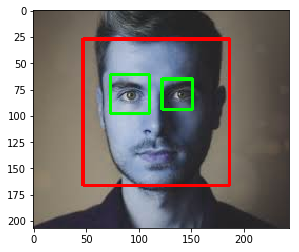

In [5]:
faces = FACE_CLASSIFIER.detectMultiScale(gray, 1.3, 5)
#making rectangles around the detected area
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#passing image,coordinates and color of the rectangle to be drawn
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = EYE_CLASSIFIER .detectMultiScale(roi_gray)#eyes inside the faces
    for (ex,ey,ew,eh) in eyes:#passing the detected face region , coordinates and color and thick of the rectangle to be drawn
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## In videos 

In [9]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('op.avi',fourcc, 20.0, (640,480))


In [10]:
cap = cv2.VideoCapture("test.mp4")#capturing this test video
while(True):
    ret, frame = cap.read()
    
    if not ret:#when video finishes then break
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = FACE_CLASSIFIER.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(30, 30),
        
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:#plot rectange around the face in that frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Vid',frame)#video sequence plays on
    
    out.write(frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()